In [1]:
%pylab --no-import-all notebook
%gui qt
%load_ext autoreload
%autoreload 2

import h5py
import ase.build

import sys
sys.path.insert(0,'../')
sys.path.insert(0,'../../pyNSID')
sys.path.insert(0,'../../sidpy')
import sidpy
import pyNSID

print(pyNSID.__version__)
import pyTEMlib
import pyTEMlib.file_tools
pyTEMlib.__version__

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
0.0.5
You attempted to load a Gwyddion file, but this requires gwyfile.
     Please Load it with pip install gwyfile
You attempted to load a Nanonis file, but this requires Nanonispy.
     Please Load it with pip install nanonispy
You attempted to load a Nanonis file, but this requires Nanonispy.
     Please Load it with pip install nanonispy
Symmetry functions of spglib enabled


'0.2022.11.1'

/mnt/c/Users/gduscher/Documents/Github/pyTEMlib/notebooks/../../pyNSID/pyNSID/io/hdf_utils.py:374: FutureWarning: validate_h5_dimension may be removed in a future version
  if not isinstance(h5_dim, h5py.Dataset):


<IPython.core.display.Javascript object>


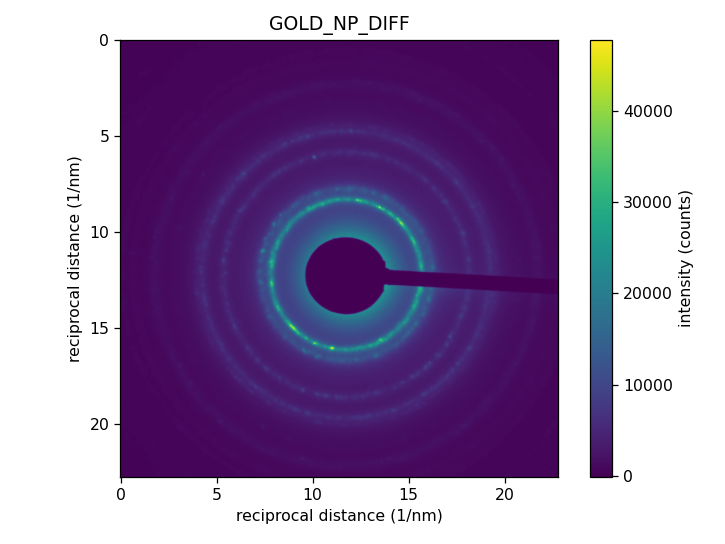

In [16]:
file_name = '../example_data/GOLD-NP-DIFF.dm3'
dataset2 = pyTEMlib.file_tools.open_file(file_name, write_hdf_file=True)
view = dataset2['Channel_000'].plot()

In [5]:
dataset2['Channel_000']

sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(2048, 2048), dtype=int32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
u:  reciprocal distance (1/nm) of size (2048,)
v:  reciprocal distance (1/nm) of size (2048,)
 with metadata: ['experiment']

In [108]:
import sidpy
datasets = dataset2.copy()
datasets['Channel_000'].original_metadata ={}
h5_file = h5py.File('test2.hf5', mode='a')
h5_measurement_group = sidpy.hdf.prov_utils.create_indexed_group(h5_file, 'Measurement_')
for key, dataset in datasets.items():
    h5_group = h5_measurement_group.create_group(key)
    print(h5_group)

    if isinstance(dataset, sidpy.Dataset):
        h5_dataset = pyNSID.hdf_io.write_nsid_dataset(dataset, h5_group)
        print (dataset)
        dataset.h5_dataset = h5_dataset
        h5_dataset.file.flush()
    elif isinstance(dataset, dict):
        sidpy.hdf.hdf_utils.write_dict_to_h5_group(h5_group, dataset)
    else:
        print('could not save item ', key, 'of dataset dictionary')


<HDF5 group "/Measurement_001/Channel_000" (0 members)>
sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(2048, 2048), dtype=int32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
u:  reciprocal distance (1/nm) of size (2048,)
v:  reciprocal distance (1/nm) of size (2048,)
 with metadata: ['experiment']


/mnt/c/Users/gduscher/Documents/Github/pyTEMlib/notebooks/../../pyNSID/pyNSID/io/hdf_utils.py:370: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


In [32]:
sidpy.hdf_utils.print_tree(h5_file, rel_paths=False)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ GOLD_NP_DIFF
      ------------
      ├ GOLD_NP_DIFF
      ├ metadata
        --------
        ├ experiment
          ----------
      ├ u
      ├ v


In [29]:
h5_file.close()

In [9]:
datasets = dataset2.copy()

In [10]:
datasets['Channel_001'] = datasets['Channel_000'].copy()
datasets['Log_000'] = {'gar':{'nix': [3,4,5]}}
datasets['Ref_000'] =  datasets['Channel_000'].copy()

In [11]:
h5_dataset = pyTEMlib.file_tools.save_dataset(datasets, filename='test.hf5', h5_group='Channel_001')



/mnt/c/Users/gduscher/Documents/Github/pyTEMlib/notebooks/../../pyNSID/pyNSID/io/hdf_utils.py:370: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
/mnt/c/Users/gduscher/Documents/Github/pyTEMlib/notebooks/../../pyNSID/pyNSID/io/hdf_utils.py:370: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
/mnt/c/Users/gduscher/Documents/Github/pyTEMlib/notebooks/../../pyNSID/pyNSID/io/hdf_utils.py:370: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


In [12]:
sidpy.hdf_utils.print_tree(h5_dataset.file, rel_paths=False)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ GOLD_NP_DIFF
      ------------
      ├ GOLD_NP_DIFF
      ├ metadata
        --------
        ├ experiment
          ----------
      ├ original_metadata
        -----------------
        ├ DM
          --
        ├ DocumentObjectList
          ------------------
          ├ 0
            -
            ├ AnnotationGroupList
              -------------------
              ├ 0
                -
                ├ Font
                  ----
                ├ ObjectTags
                  ----------
            ├ ImageDisplayInfo
              ----------------
              ├ DimensionLabels
                ---------------
              ├ MainSliceId
                -----------
            ├ ObjectTags
              ----------
        ├ DocumentTags
          ------------
        ├ Image Behavior
          --------------
          ├ UnscaledTransform
            -----------------
          ├ ZoomAndMoveTransform
  

In [113]:
h5_dataset.file.close()

In [13]:
pp = pyTEMlib.file_tools.open_file('test.hf5', write_hdf_file=True)

/home/nyd/anaconda3/envs/ase/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [15]:
pp

{'Channel_000': sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(2048, 2048), dtype=int32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
  data contains: intensity (counts)
  and Dimensions: 
 u:  reciprocal distance (1/nm) of size (2048,)
 v:  reciprocal distance (1/nm) of size (2048,)
  with metadata: ['metadata', 'original_metadata'],
 'Channel_001': sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(2048, 2048), dtype=int32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
  data contains: intensity (counts)
  and Dimensions: 
 u:  reciprocal distance (1/nm) of size (2048,)
 v:  reciprocal distance (1/nm) of size (2048,)
  with metadata: ['metadata', 'original_metadata'],
 'Ref_000': sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(2048, 2048), dtype=int32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
  data contains: intensity (counts)
  and Dimensions: 
 u:  reciprocal distance (1/nm) of size (2048,)
 v:  reciprocal distance (1/nm) of size

In [63]:
file_name = '../example_data/GOLD_NP_DIFF-1.hf5'
datasets = pyTEMlib.file_tools.open_file(file_name, write_hdf_file=True)

view = datasets['Channel_000'].plot()

FileNotFoundError: ../example_data/GOLD_NP_DIFF-1.hf5 does not exist

In [ ]:
pp['Channel_000'].h5_dataset.file.close()

In [117]:
pp['Channel_000'].h5_dataset.parent.parent.parent

<HDF5 group "/Measurement_000" (4 members)>

In [4]:
import SciFiReaders
reader = SciFiReaders.NSIDReader('test3.hf5')
datasets = reader.read()
dataset_dict = {}
for index, dataset in enumerate(datasets):
    title = dataset.title.split('/')[2]
    dataset_dict[title] = dataset
    if index ==0:
        file = datasets[0].h5_dataset.file
        master_group = datasets[0].h5_dataset.parent.parent.parent

In [5]:
master_group

<HDF5 group "/Measurement_000" (4 members)>

In [6]:
for key in master_group.keys():
    print(key)
    if key =='Log_000':
        print(key)
        print(master_group.name+'/'+key)
key ='Log_000'     
dd ={}
dd = sidpy.hdf.hdf_utils.h5_group_to_dict(master_group[key])


Channel_000
Channel_001
Log_000
Log_000
/Measurement_000/Log_000
Ref_000


In [8]:
dd = h5_group_to_dict(datasets[0].h5_dataset.parent['metadata'])
dd

NameError: name 'h5_group_to_dict' is not defined

In [10]:
group_dict ={}
group  = datasets[0].h5_dataset.parent['metadata']

group_dict[group.name.split('/')[-1]] = dict(group.attrs)
for key in group.keys():
    print(key)
    dd = sidpy.hdf.hdf_utils.h5_group_to_dict(group[key], group_dict[group.name.split('/')[-1]])
dd

experiment


{'experiment': {'acceleration_voltage': 199990.28125,
  'exposure_time': 0.5,
  'microscope': 'Libra 200 MC'}}

In [168]:

def h5_group_to_dict(group, group_dict={}):
    print(group)
    group_dict[group.name.split('/')[-1]] = dict(group.attrs)
    for key in group.keys():
        print(key)
        h5_group_to_dict(group[key], group_dict[group.name.split('/')[-1]])
    return group_dict

In [208]:
dset =datasets[0].h5_dataset
for key in dset.parent:
    print(key)
    if isinstance(dset.parent[key], h5py.Group):
        if key[0] != '_':
            print(key)
            setattr(dset, key, h5_group_to_dict(dset.parent[key]))
            

GOLD_NP_DIFF
metadata
metadata
<HDF5 group "/Measurement_000/Channel_000/GOLD_NP_DIFF/metadata" (1 members)>

experiment
<HDF5 group "/Measurement_000/Channel_000/GOLD_NP_DIFF/metadata/experiment" (0 members)>

u
v


In [238]:
def h5_group_to_dict(group, group_dict={}):
    group_dict[group.name.split('/')[-1]] = dict(group.attrs)
    for key in group.keys():
        h5_group_to_dict(group[key], group_dict[group.name.split('/')[-1]])
    return group_dict

In [229]:
def h5_group_to_dict(group, group_dict={}):
    group_dict[group.name.split('/')[-1]] = dict(group.attrs)
    for key in group.keys():
        h5_group_to_dict(group[key], group_dict[group.name.split('/')[-1]])
    return group_dict

In [249]:
def h5_group_to_dict(group, group_dict={}):

    if not isinstance(group, h5py.Group):
        raise TypeError('we need a h5py group to read from')
    if not isinstance(group_dict, dict):
        raise TypeError('group_dict needs to be a python dictionary')
        
    group_dict[group.name.split('/')[-1]] = dict(group.attrs)
    for key in group.keys():
        h5_group_to_dict(group[key], group_dict[group.name.split('/')[-1]])
    return group_dict

In [250]:
dd ={}
print(dd)
dd = h5_group_to_dict(master_group['Log_000'])
    
dd

{}


{'Log_000': {'gar': {'nix': array([3, 4, 5])}}}

In [245]:
dset.metadata

{'metadata': {'experiment': {'acceleration_voltage': 199990.28125,
   'exposure_time': 0.5,
   'microscope': 'Libra 200 MC'}},
 'Log_000': {'gar': {'nix': array([3, 4, 5])}}}

In [84]:
sidpy.hdf_utils.print_tree(master_group)

/Measurement_000
├ Channel_000
  -----------
  ├ GOLD_NP_DIFF
    ------------
    ├ GOLD_NP_DIFF
    ├ metadata
      --------
      ├ experiment
        ----------
    ├ u
    ├ v
├ Channel_001
  -----------
  ├ GOLD_NP_DIFF
    ------------
    ├ GOLD_NP_DIFF
    ├ metadata
      --------
      ├ experiment
        ----------
    ├ u
    ├ v
├ Log_000
  -------
  ├ gar
    ---
├ Ref_000
  -------
  ├ GOLD_NP_DIFF
    ------------
    ├ GOLD_NP_DIFF
    ├ metadata
      --------
      ├ experiment
        ----------
    ├ u
    ├ v


In [7]:
datasets['Channel_000'].h5_dataset.file.close()

ValueError: Not an id of a file object (not an ID of a file object)

In [29]:
dataset[0].title.split('/')[2]

'Channel_000'

In [30]:
import SciFiReaders
reader = SciFiReaders.NSIDReader(file_name)
datasets = reader.read()

In [31]:
datasets[0].title
#h5_dataset.name

'/Measurement_000/Channel_000/GOLD_NP_DIFF/GOLD_NP_DIFF'

In [32]:
datasets[0].h5_dataset.file.close()

In [4]:
atoms = ase.build.bulk('Al', 'fcc', a=4.05, cubic=True)
dataset2.structures.update({'Al': atoms})
atoms = ase.build.bulk('Cu', 'fcc', a=4.05, cubic=True)
dataset2.structures.update({'Cu': atoms})

In [13]:
dataset

{0: sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(2048, 2048), dtype=int32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
  data contains: intensity (counts)
  and Dimensions: 
 u:  reciprocal distance (1/nm) of size (2048,)
 v:  reciprocal distance (1/nm) of size (2048,)
  with metadata: ['Structure_000', 'Structure_001', 'metadata', 'original_metadata']}

/home/nyd/anaconda3/envs/ase/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<IPython.core.display.Javascript object>


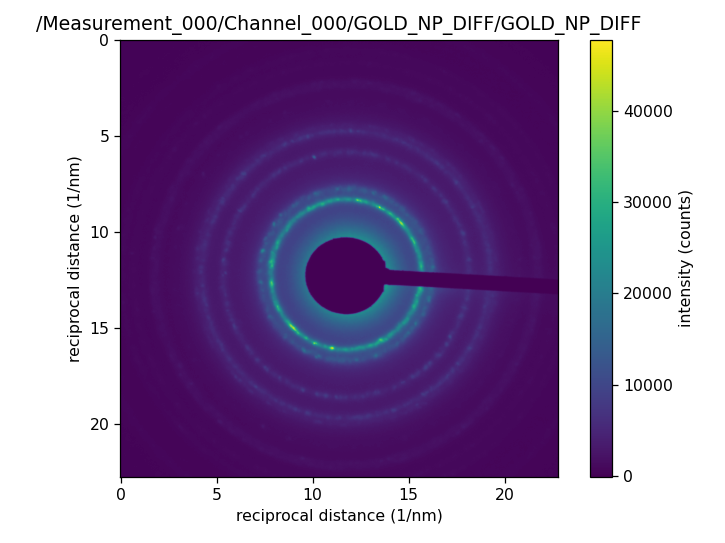

In [3]:
file_name = '../example_data/GOLD-NP-DIFF.dm3'
dataset = pyTEMlib.file_tools.open_file(file_name, write_hdf_file=False)
view = dataset.plot()

In [4]:
dataset2.structures

{'Al': Atoms(symbols='Al4', pbc=True, cell=[4.05, 4.05, 4.05]),
 'Cu': Atoms(symbols='Cu4', pbc=True, cell=[4.05, 4.05, 4.05])}

In [ ]:
import sidpy
h5_file = h5py.File('../example_data/nix.hf5', mode='a')
h5_group = sidpy.hdf.prov_utils.create_indexed_group(h5_file, 'Channel_')

In [6]:
h5_group

<HDF5 group "/Channel_000" (0 members)>

In [9]:
import pyNSID                
h5_dataset = pyNSID.hdf_io.write_nsid_dataset(dataset2, h5_group)

/mnt/c/Users/gduscher/Documents/Github/pyTEMlib/notebooks/../../pyNSID/pyNSID/io/hdf_utils.py:370: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


In [10]:
h5_dataset.file.flush()

In [9]:
h5_dataset.parent.keys()

<KeysViewHDF5 ['GOLD_NP_DIFF', 'Structure_000', 'Structure_001', 'metadata', 'original_metadata', 'u', 'v']>

In [11]:
import sidpy
sidpy.hdf_utils.print_tree(h5_dataset.parent, rel_paths=False)

/Measurement_000/Channel_000/GOLD_NP_DIFF
├ GOLD_NP_DIFF
├ Structure_000
  -------------
  ├ Al
    --
    ├ info
      ----
├ Structure_001
  -------------
  ├ Cu
    --
    ├ info
      ----
├ metadata
  --------
  ├ experiment
    ----------
├ original_metadata
  -----------------
  ├ DM
    --
  ├ DocumentObjectList
    ------------------
    ├ 0
      -
      ├ AnnotationGroupList
        -------------------
        ├ 0
          -
          ├ Font
            ----
          ├ ObjectTags
            ----------
      ├ ImageDisplayInfo
        ----------------
        ├ DimensionLabels
          ---------------
        ├ MainSliceId
          -----------
      ├ ObjectTags
        ----------
  ├ DocumentTags
    ------------
  ├ Image Behavior
    --------------
    ├ UnscaledTransform
      -----------------
    ├ ZoomAndMoveTransform
      --------------------
  ├ ImageList
    ---------
    ├ 0
      -
      ├ ImageData
        ---------
        ├ Calibrations
          --------

In [12]:
h5_dataset.file.close()

In [13]:
h5_dataset.file.close()
import SciFiReaders
current_channel = dataset2.h5_dataset.parent
reader = SciFiReaders.NSIDReader(current_channel.file.filename)
datasets = reader.read()

ValueError: Parent of an anonymous object is undefined

/home/nyd/anaconda3/envs/ase/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<IPython.core.display.Javascript object>


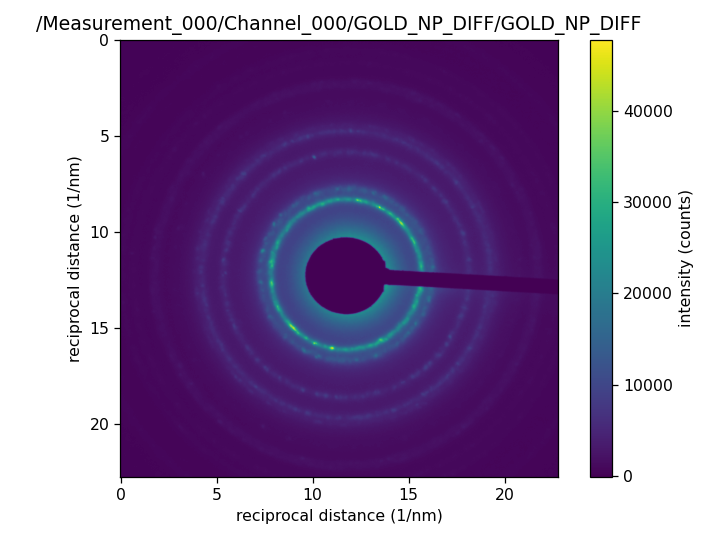

In [17]:
file_name = '../example_data/GOLD_NP_DIFF.hf5'
dataset = pyTEMlib.file_tools.open_file(file_name, write_hdf_file=False)
view = dataset.plot()

In [15]:
dataset.structures


{'Al': Atoms(symbols='Al4', pbc=False, cell=[4.05, 4.05, 4.05]),
 'Cu': Atoms(symbols='Cu4', pbc=False, cell=[4.05, 4.05, 4.05])}

In [18]:
dataset.h5_dataset.file.close()

ValueError: Not an id of a file object (not an ID of a file object)

In [ ]:
file_name

In [22]:
def make_simple_h5_dataset():
    file_path = 'nsid_simple.h5'
    h5_file = h5py.File(file_path, 'a')
    h5_group = h5_file.create_group('MyGroup')
    data = np.random.normal(size = (2,3))
    print(data.shape)
    h5_dataset = h5_group.create_dataset('data', data=data)

    dims = {0: h5_group.create_dataset('a', np.arange(data.shape[0])),
            1: h5_group.create_dataset('b', np.arange(data.shape[1]))}
    for dim, this_dim_dset in dims.items():
        name = this_dim_dset.name.split('/')[-1]
        print(name)
        this_dim_dset.make_scale(name)
        h5_dataset.dims[dim].label = name
        h5_dataset.dims[dim].attach_scale(this_dim_dset)
test_not_h5_dataset()


(2, 3)
a
b


In [24]:
import pyNSID
pyNSID.hdf_utils.check_if_main(np.arange(3))

False

In [26]:
import dask
dask.dataset.from_array(np.arange(3))

AttributeError: module 'dask' has no attribute 'dataset'